# Face male female recognition

In this notebook we will train a model to recognize if the person in the picture is male or female.





### Labels

We can create the proper label using the file name using the next layout:

```
[age]_[gender]_[race]_[date&time].jpg
```


    * [age] is an integer from 0 to 116, indicating the age
    
    * [gender] is either 0 (male) or 1 (female)
    
    * [race] is an integer from 
      0 White, 
      1 Black, 
      2 Asian, 
      3 Indian, 
      4 Others (like Hispanic, Latino, Middle Eastern).
    
    * [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace


example: 

21_1_0_20170109214656355.jpg.chip.jpg

age    = 21
gender = 1  # 1 ( female )
race   = 0  # 0 white
datetime = 2017-01-09  21:46:56355

### import libraries

In [1]:
import json
import matplotlib.pyplot as plt
import numpy              as np
import os
import random
import shutil
import zipfile
from datetime             import datetime

In [2]:
import tensorflow as tf

from tensorflow                import keras
from keras                     import layers
from keras                     import Model
from keras.optimizers          import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils               import img_to_array, load_img


2023-11-13 14:29:50.482659: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 14:29:50.706453: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 14:29:50.708204: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 14:29:51.838404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### python and tf versions

In [3]:
import sys
print( 'python    version: {}'.format( sys.version ) )
print( 'tensoflow version: {}'.format( tf.__version__ ) )


python    version: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
tensoflow version: 2.12.0


### colab Flag

In [4]:
try:
  import google.colab
  IN_COLAB = True
  
  from google.colab import drive
  drive.mount( '/content/drive' )
  base_dir = '/content/drive/MyDrive/data/face_age/' 
  

except:
  IN_COLAB = False
  base_dir = '/home/art/data/face_age/'  


### set directory paths

In [5]:
if IN_COLAB:
  base_dir = '/content/drive/MyDrive/data/face_age/' 
else:
  base_dir = '/home/art/data/face_age/'  


In [6]:
# current working directory

os.getcwd()


'/home/art/git/tf/face'

### download files


!wget -O faces.tar.gz https://drive.google.com/file/d/0BxYys69jI14kRjNmM0gyVWM2bHM/view?usp=share_link&resourcekey=0-nqc2K3On6J_sCj7TGq2qLw

### decompress

tar zxvf faces.tar.gz

### prepare files

In [7]:
# train_dir = './faces'
#train_dir = '/home/art/data/face_age/utkface_small/'

data_dir       = os.path.join( base_dir, 'crop_00' )
train_dir      = os.path.join( data_dir, 'train' ) 
validation_dir = os.path.join( data_dir, 'validation' ) 

train_male_dir   = os.path.join( train_dir, 'male'   )
train_female_dir = os.path.join( train_dir, 'female' )

validation_male_dir   = os.path.join( validation_dir, 'male'   )
validation_female_dir = os.path.join( validation_dir, 'female' )



### split data in train and validation

In [8]:
male_file_names   = os.listdir( train_male_dir  )
female_file_names = os.listdir( train_female_dir )

male_len = int( len( male_file_names ) * 0.20 )
male_file_names = random.sample( male_file_names, male_len )

female_len = int( len( male_file_names ) * 0.20 )
female_file_names = random.sample( female_file_names, female_len )

print( 'Number of training images' )
print( 'male_len: {}'.format( male_len ) )
print( 'female_len: {}'.format( female_len ) )


Number of training images
male_len: 696
female_len: 139


In [9]:
print( 'male file names' )
print( male_file_names[ 0: 5 ] )
print( len( male_file_names ) )

print( 'female file names' )
print( female_file_names[ 0: 5 ] )
print( len( female_file_names ) )


male file names
['67_0_0_20170109002521701.jpg', '2_0_4_20170103213256420.jpg', '10_0_0_20170110225013755.jpg', '61_0_0_20170111171747577.jpg', '27_0_1_20170104181441861.jpg']
696
female file names
['96_1_0_20170110182433943.jpg', '1_1_3_20161219230507432.jpg', '2_1_2_20161219151908347.jpg', '2_1_4_20161221202842353.jpg', '1_1_3_20161220220046801.jpg']
139


### copy files to validation directory

In [10]:
def copy_to_val_dir( file_names, src_dir, tar_dir ):
    for i in file_names:
        src = os.path.join( src_dir, i )
        tar = os.path.join( tar_dir, i )
        shutil.copy( src, tar )
    
    print( '{} files copied'.format( len( file_names ) ) )

 copy 5 files


copy_to_val_dir( male_file_names[0:5]  , train_male_dir  , validation_male_dir   )
copy_to_val_dir( female_file_names[0:5], train_female_dir, validation_female_dir )

copy all the validation files


copy_to_val_dir( male_file_names  , train_male_dir  , validation_male_dir   )
copy_to_val_dir( female_file_names, train_female_dir, validation_female_dir )


### remove files from train directory

In [11]:
'''
def remove_from_train_dir( file_names, src_dir ):
    for i in file_names:
        filename = os.path.join( src_dir, i )

        if os.path.exists( filename ):
            os.remove( filename )
    
    print( '{} files removed'.format( len( file_names ) ) )
'''



    

"\ndef remove_from_train_dir( file_names, src_dir ):\n    for i in file_names:\n        filename = os.path.join( src_dir, i )\n\n        if os.path.exists( filename ):\n            os.remove( filename )\n    \n    print( '{} files removed'.format( len( file_names ) ) )\n"

remove_from_train_dir( male_file_names  , train_male_dir   )
remove_from_train_dir( female_file_names, train_female_dir )

#src_dir = train_dir

src_dir = '/home/art/data/face_age/crop_part1/'
tar_dir = '/home/art/data/face_age/utk/'



### set Global variables

In [12]:
class Params:
    #data_dir             = './'
    
    # data generator
    batch_size  = 32
    target_size = (150, 150)
    class_mode  = 'binary'  # binary, categorical, other
    
    # model
    kernel_size = (3,3) # keras.layer.Conv2D()
    input_shape = (150, 150, 3) # desired input image dimentions. (width, height, channels of color)
    pool_size   = (2,2)  # keras.layer.MaxPoolSize()
    learning_rate = 0.001  # default 0.001
    
    # training
    epochs = 25
    
    num_train_img = 0 #9761    
    
    def __init__(self):
        self.data_dir             = data_dir #'/home/art/data/face_age/crop_00'
        self.train_dir            = os.path.join( self.data_dir, 'train/' )
        self.validation_dir       = os.path.join( self.data_dir, 'validation/' )
    
        self.train_male_dir       = os.path.join( self.train_dir, 'male'   )
        self.train_female_dir     = os.path.join( self.train_dir, 'female' )

        self.validation_male_dir  = os.path.join( self.validation_dir, 'male'   )
        self.validation_female_dir= os.path.join( self.validation_dir, 'female' )

        
        self.num_train_male_dir   = len( os.listdir( self.train_male_dir   ) ) 
        self.num_train_female_dir = len( os.listdir( self.train_female_dir ) ) 
        self.num_train_img        = self.num_train_male_dir + self.num_train_female_dir

        self.num_val_male_dir     = len( os.listdir( self.validation_male_dir   ) )
        self.num_val_female_dir   = len( os.listdir( self.validation_female_dir ) )
        self.num_validation_img   = self.num_val_male_dir + self.num_val_female_dir

In [13]:
params = Params()

In [14]:
# debug paths
print( 'data_dir      : ', params.data_dir )
print( 'train_dir     : ', params.train_dir )
print( 'validation_dir: ', params.validation_dir )

print( 'num_train_img     : ', params.num_train_img      )
print( 'num_validation_img: ', params.num_validation_img )

print( 'num male   train img     : ', params.num_train_male_dir   )
print( 'num female train img     : ', params.num_train_female_dir )

print( 'num male   validation img: ', params.num_val_male_dir   )
print( 'num female validation img: ', params.num_val_female_dir )

print( 'num of images', params.num_train_img +  params.num_validation_img )

data_dir      :  /home/art/data/face_age/crop_00
train_dir     :  /home/art/data/face_age/crop_00/train/
validation_dir:  /home/art/data/face_age/crop_00/validation/
num_train_img     :  8717
num_validation_img:  1044
num male   train img     :  3483
num female train img     :  5234
num male   validation img:  870
num female validation img:  174
num of images 9761


In [15]:
print( 'train_male_dir     : ', params.train_male_dir )
print( 'train_female_dir     : ', params.train_female_dir )


train_male_dir     :  /home/art/data/face_age/crop_00/train/male
train_female_dir     :  /home/art/data/face_age/crop_00/train/female


### explore files

In [16]:
train_male_names = os.listdir( params.train_male_dir )
print( 'train male names: {}'.format( train_male_names[ : 3 ] ) )

train_female_names = os.listdir( params.train_female_dir )
print( 'train female names: {}'.format( train_female_names[ : 3 ] ) )

train male names: ['18_0_0_20170110232448997.jpg', '2_0_0_20170109194104628.jpg', '17_0_0_20170110232438939.jpg']
train female names: ['17_1_0_20170104012433529.jpg', '26_1_3_20170104222922568.jpg', '15_1_0_20170109214723528.jpg']


In [17]:
validation_male_names = os.listdir( params.validation_male_dir )
print( 'validation male names: {}'.format( validation_male_names[ : 3 ] ) )

validation_female_names = os.listdir( params.validation_female_dir )
print( 'validation female names: {}'.format( validation_female_names[ : 3 ] ) )

validation male names: ['75_0_2_20170110131323894.jpg', '27_0_0_20170104193647416.jpg', '75_0_3_20170111210912724.jpg']
validation female names: ['69_1_0_20170110122730511.jpg', '29_1_0_20170103181510040.jpg', '57_1_0_20170110160643579.jpg']


### total number of files

In [18]:
print( 'train_male_names   total images {}'.format( len( train_male_names      ) ))
print( 'train_female_names total images {}'.format( len( train_female_names  ) ))

t = len( train_male_names) + len( train_female_names)
print( 'number of training files: {}'.format( t ))

train_male_names   total images 3483
train_female_names total images 5234
number of training files: 8717


In [19]:
print( 'validation_male_names   total images {}'.format( len( validation_male_names      ) ))
print( 'validation_female_names total images {}'.format( len( validation_female_names  ) ))

t = len( validation_male_names) + len( validation_female_names)
print( 'number of validation files: {}'.format( t ))


validation_male_names   total images 870
validation_female_names total images 174
number of validation files: 1044


### some util functions

In [20]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    

### create generators

In [21]:
# this function take as input a params object, and
# return the image data generator for training and validation data.
# 
# Params : is an instance with all the parameters, directories, batch_size, target_size. Also, we can add more
#          parameters such as augmentation parameters without modifiying the function definitions nor 
#          other dependencies.

def get_generators( params ):
    # training image generator
    train_datagen = ImageDataGenerator(
        rescale            = 1.0 / 255,
        
        # augmentation parameters
        width_shift_range  = 0.20,
        height_shift_range = 0.20,
        rotation_range     = 0.20,
        shear_range        = 0.20,
        zoom_range         = 0.20,
        horizontal_flip    = True
    )
    
    train_generator = train_datagen.flow_from_directory(
        directory   = params.train_dir,
        batch_size  = params.batch_size,
        class_mode  = params.class_mode, # 'binary',
        target_size = params.target_size
    )
    
    val_datagen = ImageDataGenerator(
    rescale = 1.0 / 255 )
    
    val_generator = val_datagen.flow_from_directory(
        directory   = params.validation_dir,
        batch_size  = params.batch_size,
        class_mode   = params.class_mode,
        target_size = params.target_size
    )

    return train_generator, val_generator

In [22]:
train_generator, val_generator = get_generators( params )

Found 8717 images belonging to 2 classes.
Found 1044 images belonging to 2 classes.


### see our indexes classes

In [23]:
print(train_generator.class_indices)

{'female': 0, 'male': 1}


In [24]:
'''
import json
my_dic = { 'a': 'ant', 'b': 'bee' }
print( json.dumps( my_dic, indent= 3 ) )
'''

"\nimport json\nmy_dic = { 'a': 'ant', 'b': 'bee' }\nprint( json.dumps( my_dic, indent= 3 ) )\n"

### callbacks

the loss parameter can have the next structure

logs = {
  'loss'         : 0.10,
  'accuracy'     : 0.90,
  'val_loss'     : 0.15,
  'val_accuracy' : 0.85 }


In [25]:
class MyCallback( keras.callbacks.Callback ):
    
    def on_epoch_end( self, epoch, logs ={} ):
        if logs.get( 'accuracy' ) > 90:
            print( '\n MyCallback.on_epoch_end(), stop training, we have great accuracy! \n' )
            print( 'callback logs: {}'.format( json.dumps( logs, indent=3 ) ) )
            
            self.model.stop_training = True
    
callbacks = MyCallback()    
    

### trainer function

In [26]:
def train_model( model, train_generator, params, callbacks ):
    steps = params.num_train_img / params.batch_size
    
    start_time = datetime.now()

    history = model.fit(
        x               = train_generator,
        validation_data = val_generator,
        steps_per_epoch = steps,
        epochs          = params.epochs,
        callbacks       = callbacks
    )
    
    elapsed_time = datetime.now() - start_time
    print( 'time used for training: {}'.format( elapsed_time ) )
    
    return history
    

## Models

### create a model

def get_model_01( params ):
    model = keras.models.Sequential([
        
        keras.layers.Conv2D( 16, params.kernel_size, activation = 'relu', input_shape=params.input_shape ),
        keras.layers.MaxPooling2D( params.pool_size ),
        
        keras.layers.Conv2D( 32, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),
        
        '''
        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),
        '''

        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Flatten(),
        keras.layers.Dense( 512, activation = 'relu' ),
        keras.layers.Dense( 1, activation = 'sigmoid' )
    ])
    
    model.summary()
    return model

In [27]:
def get_model_01( params ):
    model = keras.models.Sequential([
        
        keras.layers.Conv2D( 16, params.kernel_size, activation = 'relu', input_shape=params.input_shape ),
        keras.layers.MaxPooling2D( params.pool_size ),
        
        keras.layers.Conv2D( 32, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),
        
        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Flatten(),
        keras.layers.Dense( 512, activation = 'relu' ),
        keras.layers.Dense( 1, activation = 'sigmoid' )
    ])
    
    model.summary()
    return model

### create model 01

In [28]:

model_01 = get_model_01( params )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

2023-11-13 14:30:19.970242: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### compile model 01

In [29]:
#optimizer = RMSprop( learning_rate = params.learning_rate )
optimizer = Adam( learning_rate = params.learning_rate )

model_01.compile(
    optimizer = optimizer,
    loss      = 'binary_crossentropy',
    metrics   = [ 'accuracy' ]
)


### train model 01

In [39]:
history = train_model( model_01, train_generator, params, callbacks )

Epoch 1/50


2023-11-13 16:34:05.238329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


273/272 [==============================] - ETA: 0s - loss: 0.2603 - accuracy: 0.8746

2023-11-13 16:35:29.995137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


272/272 [==============================] - 87s 320ms/step - loss: 0.2603 - accuracy: 0.8746 - val_loss: 0.4028 - val_accuracy: 0.8228
Epoch 2/50
272/272 [==============================] - 104s 383ms/step - loss: 0.2500 - accuracy: 0.8817 - val_loss: 0.3736 - val_accuracy: 0.8458
Epoch 3/50
272/272 [==============================] - 112s 411ms/step - loss: 0.2605 - accuracy: 0.8752 - val_loss: 0.3487 - val_accuracy: 0.8458
Epoch 4/50
272/272 [==============================] - 114s 419ms/step - loss: 0.2516 - accuracy: 0.8775 - val_loss: 0.3490 - val_accuracy: 0.8410
Epoch 5/50
272/272 [==============================] - 112s 411ms/step - loss: 0.2532 - accuracy: 0.8795 - val_loss: 0.3220 - val_accuracy: 0.8602
Epoch 6/50
272/272 [==============================] - 115s 423ms/step - loss: 0.2495 - accuracy: 0.8830 - val_loss: 0.3083 - val_accuracy: 0.8602
Epoch 7/50
272/272 [==============================] - 114s 419ms/step - loss: 0.2481 - accuracy: 0.8808 - val_loss: 0.3433 - val_accurac

### plot metrics

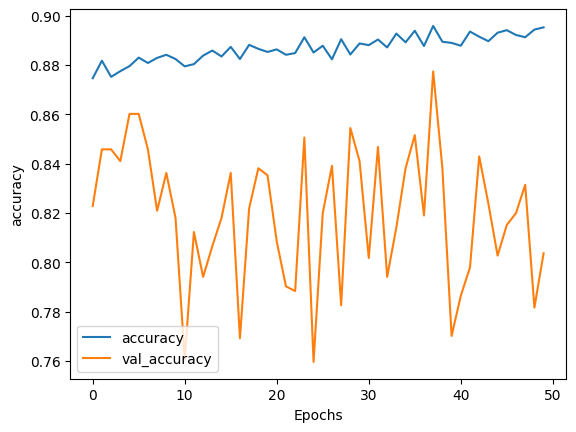

In [42]:
plot_graphs(history, "accuracy")

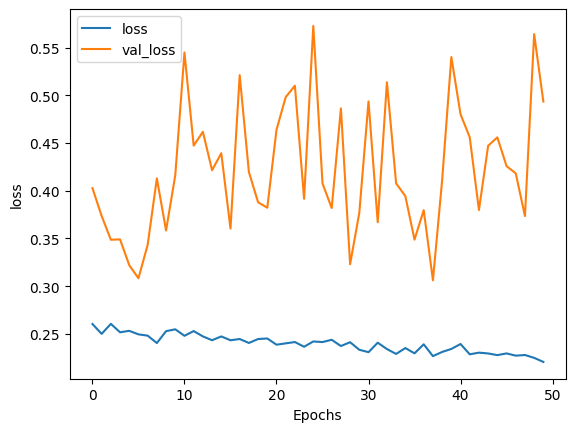

In [43]:
plot_graphs(history, "loss")

In [48]:
print( 'loss    : ', history.history[ 'loss' ][-1] )
print( 'accuracy: ', history.history[ 'accuracy' ][-1] )

print( 'val_loss    : ', history.history[ 'val_loss'     ][-1] )
print( 'val_accuracy: ', history.history[ 'val_accuracy' ][-1] )

loss    :  0.22055065631866455
accuracy:  0.8952621221542358
val_loss    :  0.49357539415359497
val_accuracy:  0.803639829158783


### save model 01

In [49]:
file_path = '/home/art/git/tf/face/model/gender/model_A02.h5'

In [50]:
#model_01.save( 'model/gender/model_A02.h5' )

### load saved model

In [32]:
model_01 = keras.models.load_model( file_path )

### save as TensorFlow format

In [5]:
#model_01.save( filepath = 'face_gender'  , save_format= 'tf' )

INFO:tensorflow:Assets written to: face_gender/assets


INFO:tensorflow:Assets written to: face_gender/assets


### predictions

In [51]:

def make_prediction( model, img_path ):
    img=load_img(img_path, target_size=(150, 150))
  
    x=img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    classes = model.predict(images, batch_size=10)
  
    print(classes[0])
    
    print( 'classes: ', classes )
    
    plt.imshow( img )
    plt.show()
  
    if classes[0]>0.5:
        print(img_path + " is a male")
    else:
        print(img_path + " is a female")

In [52]:
# set the prediction file path

img_path = '/home/art/Pictures/faces/family/aat_01.png'


In [53]:
#make_prediction( model_01, img_path )

In [54]:
def make_prediction_dir( model, src_dir ):
    file_names = os.listdir( src_dir )
    
    for i in file_names:
        img_path = os.path.join( src_dir, i )
        print( img_path )
        try:
            make_prediction( model, img_path )
        except Exception as e:
            print( 'make_prediction_dir(), error using file: {}'.format( i ) )
    
    
    
    

/home/art/Pictures/faces/girl/s03.jpg
1/1 [==============================] - 0s 101ms/step
[1.2876306e-15]
classes:  [[1.2876306e-15]]


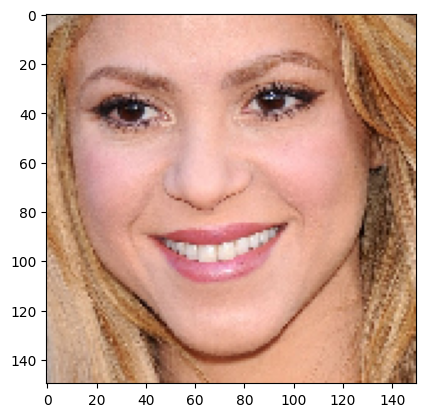

/home/art/Pictures/faces/girl/s03.jpg is a female
/home/art/Pictures/faces/girl/02.jpg
1/1 [==============================] - 0s 22ms/step
[0.00026701]
classes:  [[0.00026701]]


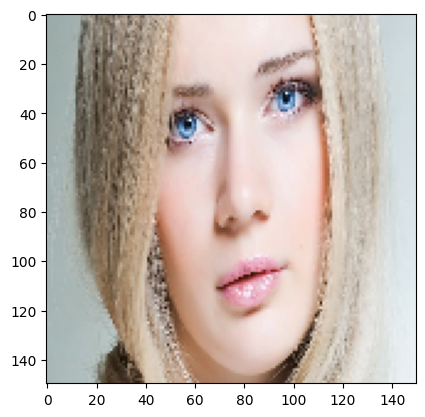

/home/art/Pictures/faces/girl/02.jpg is a female
/home/art/Pictures/faces/girl/01.jpg
1/1 [==============================] - 0s 24ms/step
[0.00034904]
classes:  [[0.00034904]]


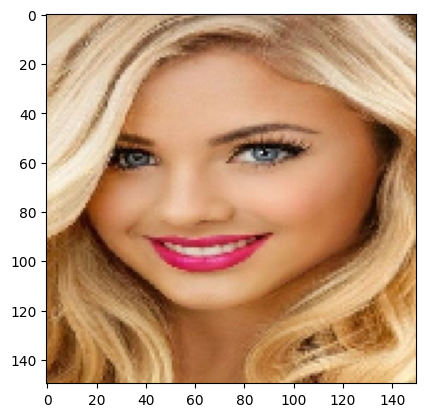

/home/art/Pictures/faces/girl/01.jpg is a female
/home/art/Pictures/faces/girl/s04.png
1/1 [==============================] - 0s 25ms/step
[0.00100869]
classes:  [[0.00100869]]


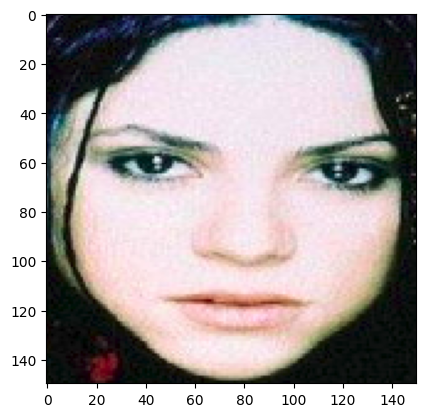

/home/art/Pictures/faces/girl/s04.png is a female
/home/art/Pictures/faces/girl/b03.jpg
1/1 [==============================] - 0s 24ms/step
[0.00070382]
classes:  [[0.00070382]]


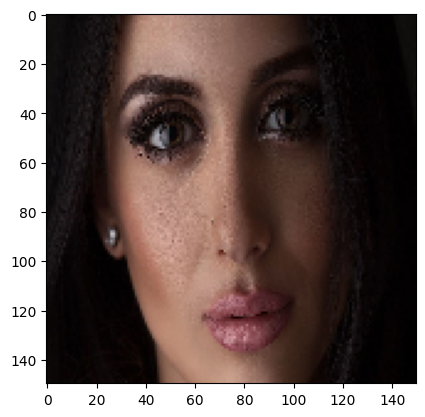

/home/art/Pictures/faces/girl/b03.jpg is a female
/home/art/Pictures/faces/girl/b01.jpg
1/1 [==============================] - 0s 23ms/step
[0.07736842]
classes:  [[0.07736842]]


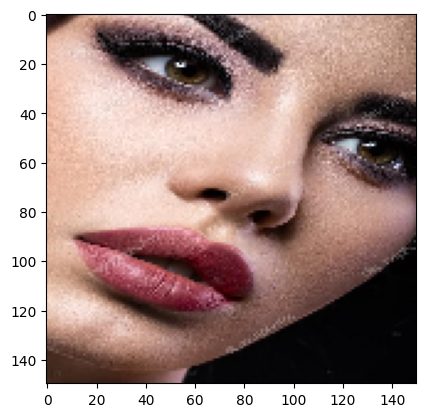

/home/art/Pictures/faces/girl/b01.jpg is a female
/home/art/Pictures/faces/girl/03.png
1/1 [==============================] - 0s 23ms/step
[2.544236e-11]
classes:  [[2.544236e-11]]


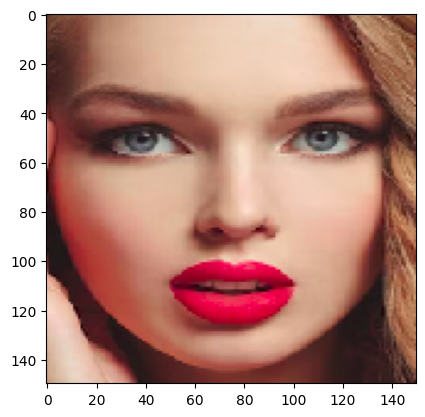

/home/art/Pictures/faces/girl/03.png is a female
/home/art/Pictures/faces/girl/r02.jpg
1/1 [==============================] - 0s 21ms/step
[0.24427558]
classes:  [[0.24427558]]


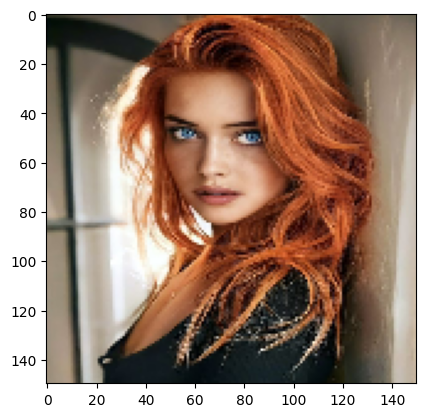

/home/art/Pictures/faces/girl/r02.jpg is a female
/home/art/Pictures/faces/girl/s01.jpeg
1/1 [==============================] - 0s 22ms/step
[0.8921063]
classes:  [[0.8921063]]


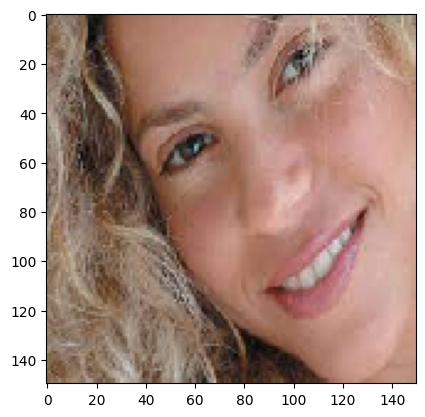

/home/art/Pictures/faces/girl/s01.jpeg is a male
/home/art/Pictures/faces/girl/b02.jpg
1/1 [==============================] - 0s 25ms/step
[0.38802144]
classes:  [[0.38802144]]


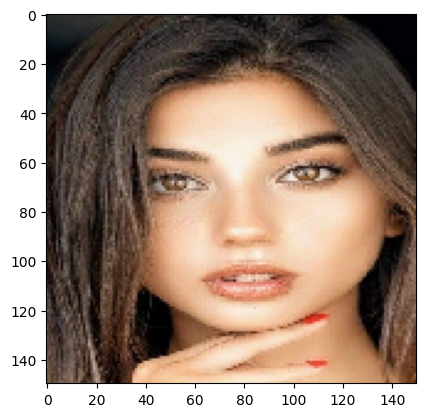

/home/art/Pictures/faces/girl/b02.jpg is a female
/home/art/Pictures/faces/girl/s02.webp
1/1 [==============================] - 0s 22ms/step
[0.21073051]
classes:  [[0.21073051]]


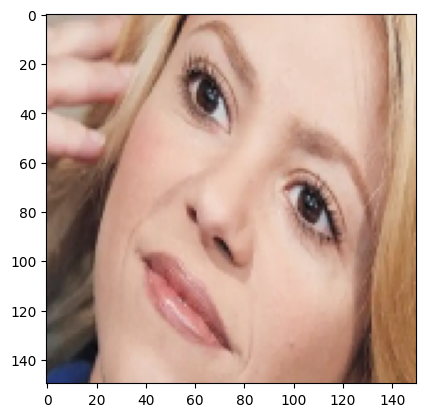

/home/art/Pictures/faces/girl/s02.webp is a female
/home/art/Pictures/faces/girl/h01.jpg
1/1 [==============================] - 0s 24ms/step
[1.8700554e-13]
classes:  [[1.8700554e-13]]


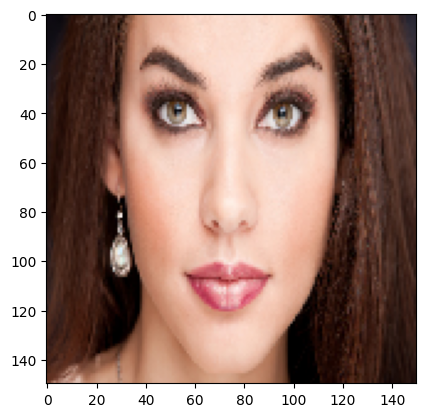

/home/art/Pictures/faces/girl/h01.jpg is a female
/home/art/Pictures/faces/girl/s02.jpg
1/1 [==============================] - 0s 23ms/step
[0.13945019]
classes:  [[0.13945019]]


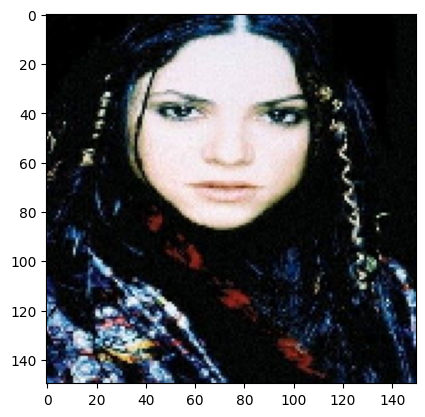

/home/art/Pictures/faces/girl/s02.jpg is a female
/home/art/Pictures/faces/girl/r03.jpg
1/1 [==============================] - 0s 21ms/step
[0.00771096]
classes:  [[0.00771096]]


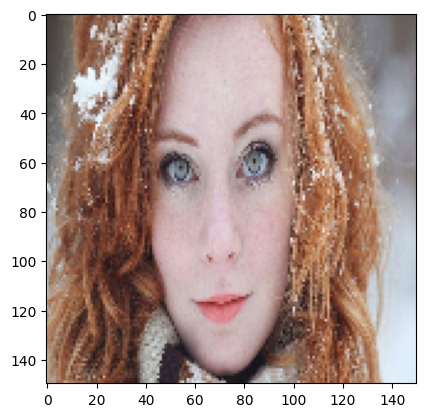

/home/art/Pictures/faces/girl/r03.jpg is a female
/home/art/Pictures/faces/girl/r01.jpg
1/1 [==============================] - 0s 22ms/step
[8.420344e-09]
classes:  [[8.420344e-09]]


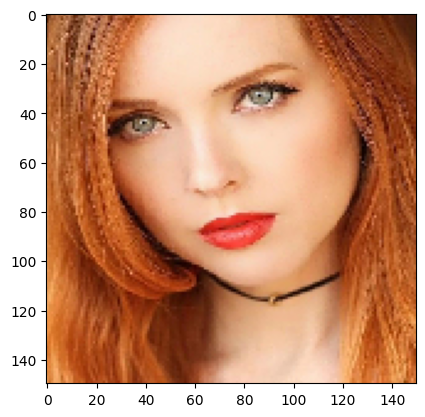

/home/art/Pictures/faces/girl/r01.jpg is a female


In [55]:
img_path = '/home/art/Pictures/faces/girl/'
make_prediction_dir( model_01, img_path )


/home/art/Pictures/faces/girl/s03.jpg
1/1 [==============================] - 0s 23ms/step
[1.2876306e-15]
classes:  [[1.2876306e-15]]


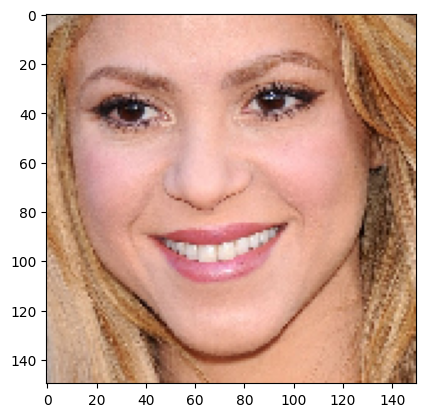

/home/art/Pictures/faces/girl/s03.jpg is a female
/home/art/Pictures/faces/girl/02.jpg
1/1 [==============================] - 0s 23ms/step
[0.00026701]
classes:  [[0.00026701]]


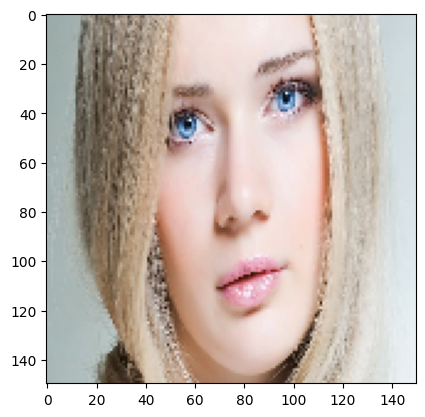

/home/art/Pictures/faces/girl/02.jpg is a female
/home/art/Pictures/faces/girl/01.jpg
1/1 [==============================] - 0s 26ms/step
[0.00034904]
classes:  [[0.00034904]]


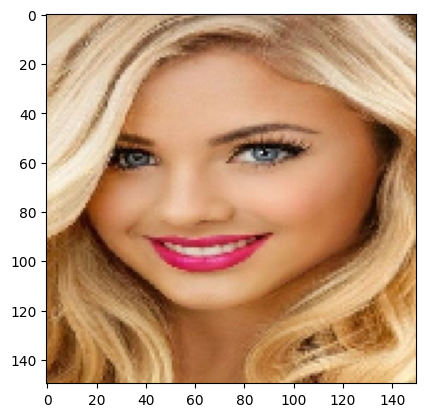

/home/art/Pictures/faces/girl/01.jpg is a female
/home/art/Pictures/faces/girl/s04.png
1/1 [==============================] - 0s 23ms/step
[0.00100869]
classes:  [[0.00100869]]


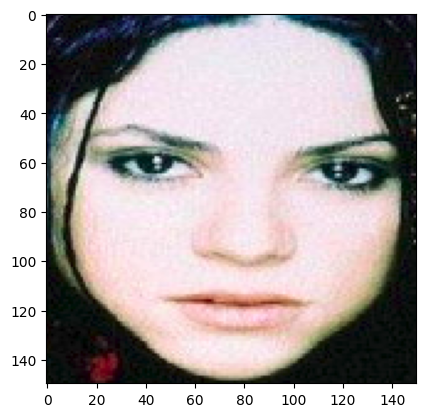

/home/art/Pictures/faces/girl/s04.png is a female
/home/art/Pictures/faces/girl/b03.jpg
1/1 [==============================] - 0s 25ms/step
[0.00070382]
classes:  [[0.00070382]]


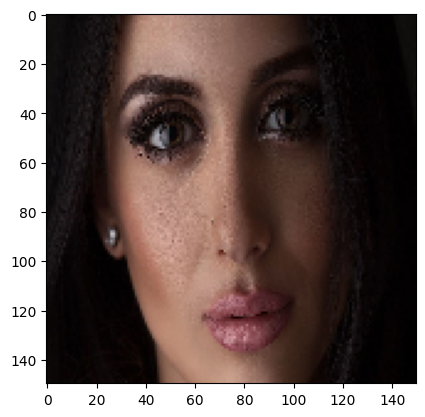

/home/art/Pictures/faces/girl/b03.jpg is a female
/home/art/Pictures/faces/girl/b01.jpg
1/1 [==============================] - 0s 23ms/step
[0.07736842]
classes:  [[0.07736842]]


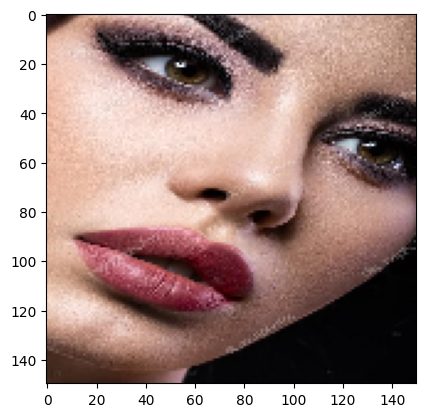

/home/art/Pictures/faces/girl/b01.jpg is a female
/home/art/Pictures/faces/girl/03.png
1/1 [==============================] - 0s 25ms/step
[2.544236e-11]
classes:  [[2.544236e-11]]


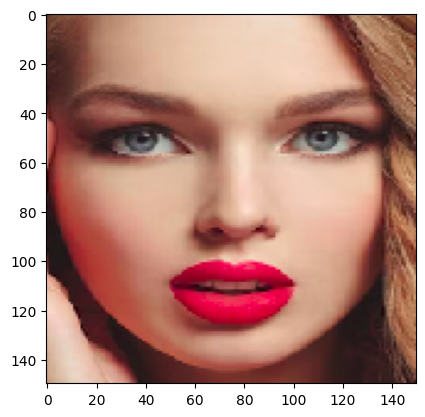

/home/art/Pictures/faces/girl/03.png is a female
/home/art/Pictures/faces/girl/r02.jpg
1/1 [==============================] - 0s 24ms/step
[0.24427558]
classes:  [[0.24427558]]


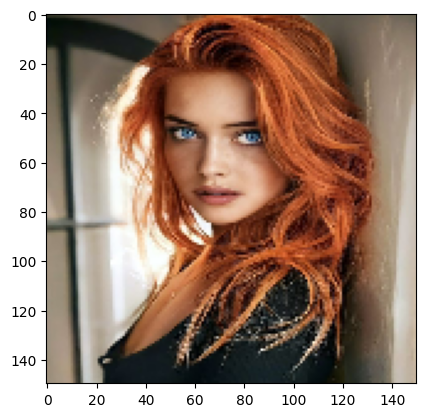

/home/art/Pictures/faces/girl/r02.jpg is a female
/home/art/Pictures/faces/girl/s01.jpeg
1/1 [==============================] - 0s 25ms/step
[0.8921063]
classes:  [[0.8921063]]


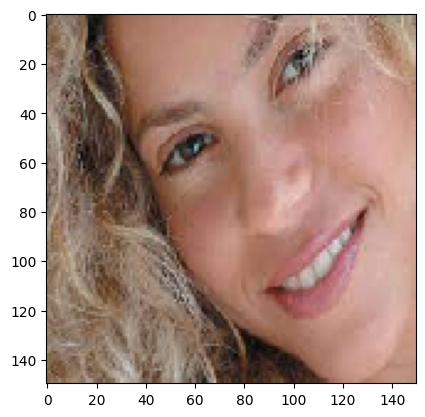

/home/art/Pictures/faces/girl/s01.jpeg is a male
/home/art/Pictures/faces/girl/b02.jpg
1/1 [==============================] - 0s 24ms/step
[0.38802144]
classes:  [[0.38802144]]


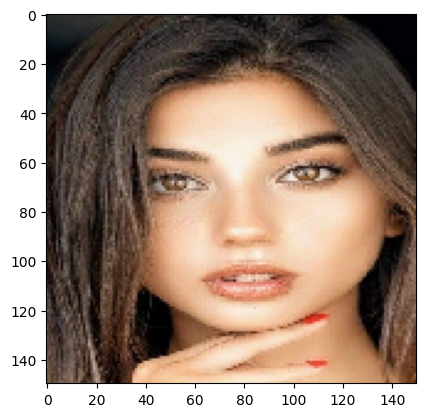

/home/art/Pictures/faces/girl/b02.jpg is a female
/home/art/Pictures/faces/girl/s02.webp
1/1 [==============================] - 0s 24ms/step
[0.21073051]
classes:  [[0.21073051]]


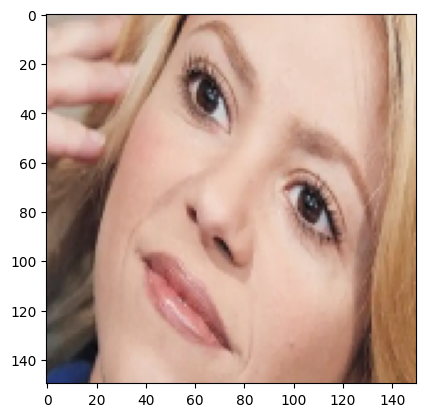

/home/art/Pictures/faces/girl/s02.webp is a female
/home/art/Pictures/faces/girl/h01.jpg
1/1 [==============================] - 0s 24ms/step
[1.8700554e-13]
classes:  [[1.8700554e-13]]


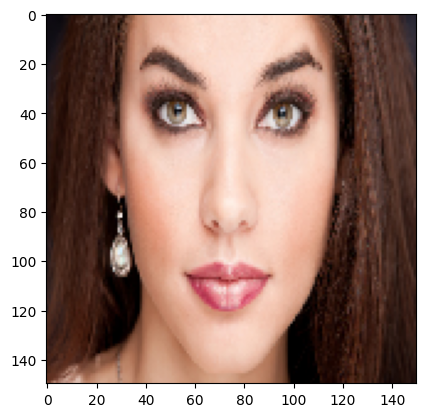

/home/art/Pictures/faces/girl/h01.jpg is a female
/home/art/Pictures/faces/girl/s02.jpg
1/1 [==============================] - 0s 22ms/step
[0.13945019]
classes:  [[0.13945019]]


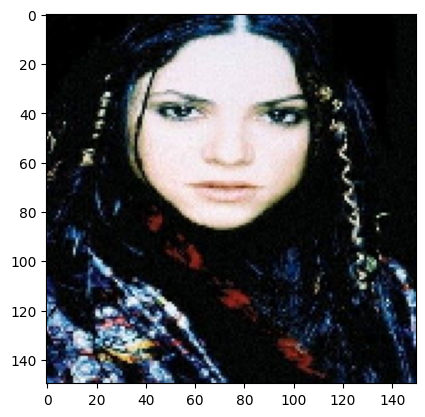

/home/art/Pictures/faces/girl/s02.jpg is a female
/home/art/Pictures/faces/girl/r03.jpg
1/1 [==============================] - 0s 23ms/step
[0.00771096]
classes:  [[0.00771096]]


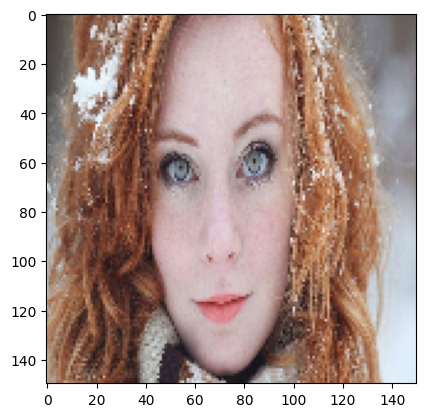

/home/art/Pictures/faces/girl/r03.jpg is a female
/home/art/Pictures/faces/girl/r01.jpg
1/1 [==============================] - 0s 26ms/step
[8.420344e-09]
classes:  [[8.420344e-09]]


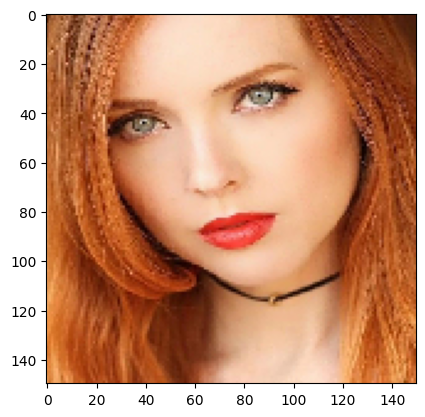

/home/art/Pictures/faces/girl/r01.jpg is a female


In [56]:
img_path = '/home/art/Pictures/faces/girl/'
make_prediction_dir( model_01, img_path )

## references


UTKFace
Large Scale Face Dataset 

https://susanqq.github.io/UTKFace/


#### Aligned&Cropped Faces

* crop_part1.tar.gz ( 2017-01-22 )

https://drive.google.com/file/d/0BxYys69jI14kRjNmM0gyVWM2bHM/view?usp=share_link&resourcekey=0-nqc2K3On6J_sCj7TGq2qLw
    

* UTKFace.tar.gz ( 2017-03-23 )

https://drive.google.com/file/d/0BxYys69jI14kYVM3aVhKS1VhRUk/view?usp=share_link&resourcekey=0-dabpv_3J0C0cditpiAfhAw

